# Master 2 AIC : Image Mining
# Lab 1 : Feature detection, description and matching
### Réalisé par Corentin Leloup & Wafa Bouzouita

In this notebook, we complete the code for the parts : Image Format and Convolutions & Detectors.

## Q1

Image dimension: 240 rows x 360 columns
Direct method: 0.2406924 s
Method filter2D : 0.0006429 s


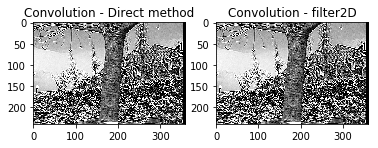

In [1]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
%matplotlib inline

#Read grayscale image and conversion to float64
img=np.float64(cv2.imread('TP1_Image_Pairs/Image_Pairs/FlowerGarden2.png',0))
(h,w) = img.shape
print("Image dimension:",h,"rows x",w,"columns")

#Direct method
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
    for x in range(1,w-1):
        val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
        img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Direct method:",time,"s")

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Convolution - Direct method')

#Method filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Method filter2D :",time,"s")

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Convolution - filter2D')

plt.show()


# Q3

Method filter2D : 0.0006595 s


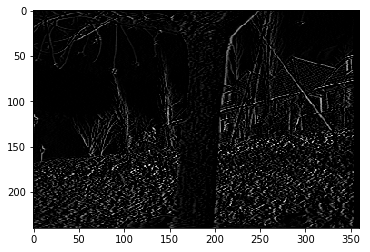

In [2]:
t1 = cv2.getTickCount()
kernel = np.array([[0, 0, 0],[-1,0,1],[0, 0, 0]])
imgx = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Method filter2D :",time,"s")

plt.imshow(imgx,cmap = 'gray',vmin = 0.0,vmax = 255.0)


Method filter2D : 0.0008122 s


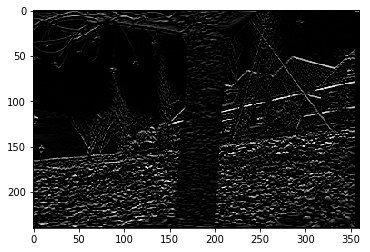

In [3]:
t1 = cv2.getTickCount()
kernel = np.array([[0, 1, 0],[0,0,0],[0, -1, 0]])
imgy = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Method filter2D :",time,"s")

plt.imshow(imgy,cmap = 'gray',vmin = 0.0,vmax = 255.0)

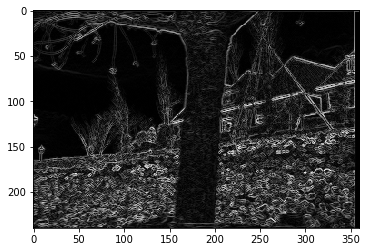

In [4]:
I=np.sqrt(np.square(imgx)+np.square(imgy))

plt.imshow(I,cmap = 'gray')

Dimension of image: 320 rows x 400 columns
Type of image: float64
My computation of Harris points: 392.8859946 s
Number of cycles per pixel: 30694.218328125 cpp
Dimension of image: 320 rows x 400 columns x 3 channels
Type of image: uint8


Text(0.5,1,'Harris points')

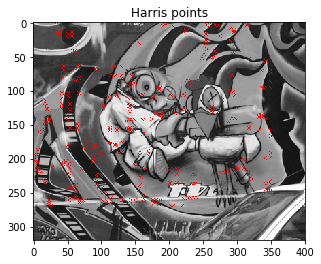

In [6]:
#Reading grayscale image and conversion to float64
img=np.float64(cv2.imread('TP1_Image_Pairs/Image_Pairs/Graffiti0.png',cv2.IMREAD_GRAYSCALE))
(h,w) = img.shape
print("Dimension of image:",h,"rows x",w,"columns")
print("Type of image:",img.dtype)

#Beginning of calculus
t1 = cv2.getTickCount()
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)

alpha=0.06
W=50
kernel = np.array([[0, 0, 0],[-1,0,1],[0, 0, 0]])
imgx = np.square(cv2.filter2D(img,-1,kernel))
kernel = np.array([[0, 1, 0],[0,0,0],[0, -1, 0]])
imgy = np.square(cv2.filter2D(img,-1,kernel))
imgxy = imgx*imgy
imgx2 = np.square(imgx)
imgy2 = np.square(imgy)
S=np.zeros((h,w,2,2))
for i in range(h-W) :
    for j in range(w-W) :
        somme=0
        for k in range(W):
            for l in range(W): 
                somme += imgx2[i+k][j+l]
        S[i][j][0][0] = somme
        
        somme=0
        for k in range(W) :
            for l in range (W): 
                somme += imgy2[i+k][j+l]
        S[i][j][1][1] = somme
        
        somme=0
        for k in range (W) :
            for l in range (W): 
                somme += imgxy[i+k][j+l]
        S[i][j][0][1] = somme
        S[i][j][1][0] = somme

for i in range (h-W) :
    for j in range (w-W) :
        Theta[i][j]=S[i][j][0][0]*S[i][j][1][1]-S[i][j][0][1]*S[i][j][1][0]-alpha*((S[i][j][0][0]**2) + (S[i][j][1][1])**2)

Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
d_maxloc = 3
seuil_relatif = 0.01
se = np.ones((d_maxloc,d_maxloc),np.uint8)
Theta_dil = cv2.dilate(Theta,se)
#Suppression of non-local-maxima
Theta_maxloc[Theta < Theta_dil] = 0.0
#Values to small are also removed
Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("My computation of Harris points:",time,"s")
print("Number of cycles per pixel:",(t2 - t1)/(h*w),"cpp")

plt.imshow(img,cmap = 'gray')
plt.title('Original image')


plt.imshow(Theta,cmap = 'gray')
plt.title('Harris function')

se_croix = np.uint8([[1, 0, 0, 0, 1],
[0, 1, 0, 1, 0],[0, 0, 1, 0, 0],
[0, 1, 0, 1, 0],[1, 0, 0, 0, 1]])
Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
#Re-read image for colour display
Img_pts=cv2.imread('TP1_Image_Pairs/Image_Pairs/Graffiti0.png',cv2.IMREAD_COLOR)
(h,w,c) = Img_pts.shape
print("Dimension of image:",h,"rows x",w,"columns x",c,"channels")
print("Type of image:",Img_pts.dtype)
#Points are displayed as red crosses
Img_pts[Theta_ml_dil > 0] = [255,0,0]

plt.imshow(Img_pts)
plt.title('Harris points')



Text(0.5,1,'Original image')

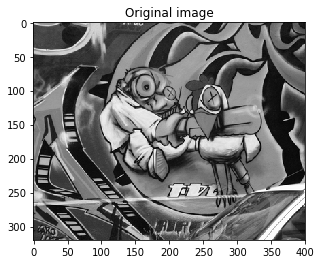

In [7]:
plt.imshow(img,cmap = 'gray')
plt.title('Original image')

Text(0.5,1,'Harris function')

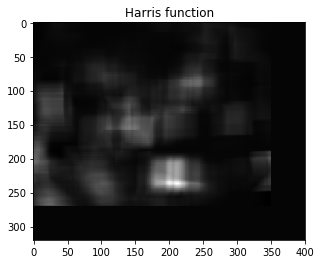

In [8]:
plt.imshow(Theta,cmap = 'gray')
plt.title('Harris function')